In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns

In [2]:
#한글 폰트 처리용
font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf',size=25).get_name()
rc('font',family=font)
rc('axes',unicode_minus=False)

In [3]:
df_train = pd.read_csv('./data/train.csv',encoding='cp949')

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 결측치 파악하기

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Survived가 1(생존)인 데이터프레임에서 'Sex' 컬럼만 선택 후 각 성별 카운트
df_train[df_train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [25]:
#그래프로 각 특성(feature)에 대해 생사 여부(Survived) 확인하기
def visualizationCatplot(feature):
    df_train['Survivor'] = df_train['Survived'].map({0:'사망',1:'생존'})
    sns.catplot(x=feature,kind='count',hue='Survivor',data=df_train)
    plt.show()

def visualizationLmplot(feature):
    sns.lmplot(feature,'Survived',hue='Sex',data=df_train)
    plt.show()

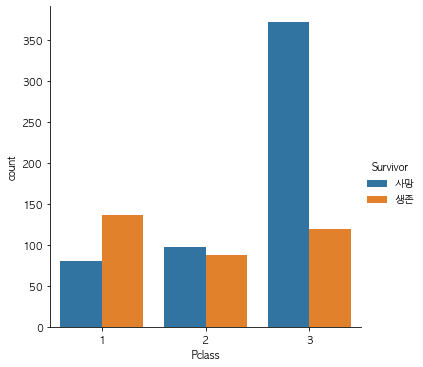

In [20]:
visualizationCatplot('Pclass')

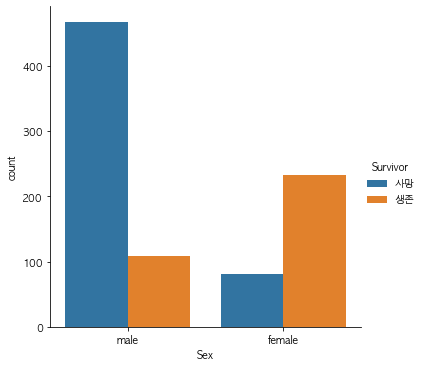

In [26]:
visualizationCatplot('Sex')

/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


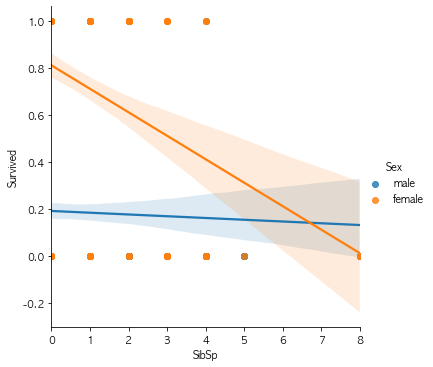

In [27]:
visualizationLmplot('SibSp') #여성의 경우 형제/자매가 많을수록 사망률이 높다

/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


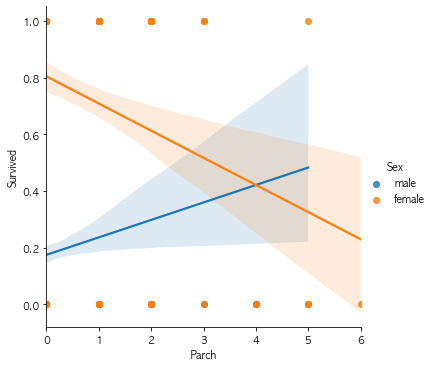

In [28]:
visualizationLmplot('Parch') #남자의 경우 부모나 자식이 많은경우 생종률이 올라감

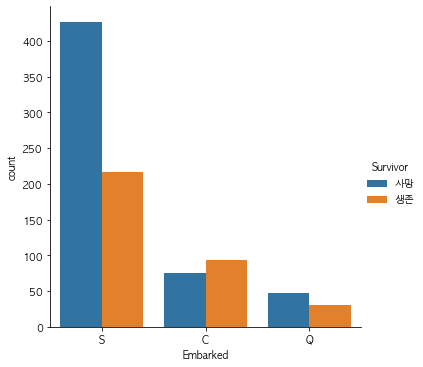

In [29]:
visualizationCatplot('Embarked')

/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


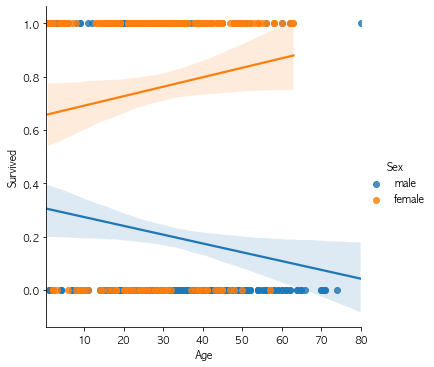

In [30]:
visualizationLmplot('Age')